# SS&C Advent Word Cloud
I wanted to find out who SS&C Advent is at their core. I wrote this program to pull the data from SS&C Advent's website and create a WordCloud from the text located on the website.

In [1]:
from bs4 import BeautifulSoup
import urllib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords


In [2]:
#Stores the webpage into a dataframe
url ="https://www.advent.com/about/"
headers = {'user-agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.3'}

In [3]:
#Request appropriate libraries
req = urllib.request.Request(url, headers=headers)
data = urllib.request.urlopen(req).read()
soup= BeautifulSoup(data, "html.parser")

In [4]:
lists = soup.find_all(['article','div'])

In [5]:
#Creates a list of all the text and stores it into a dataframe
str = ""
for list in lists:
    info= list.text
    str+=info

In [6]:
#Creates the masks and color scheme for wordcloud
mask = np.array(Image.open("Desktop/big.png"))
color= ImageColorGenerator(mask)

In [7]:
#Adds additional words to the stopwords 
stopwords = set(STOPWORDS)
stopwords.update(["John","request", "contact us", "contact", "demo", "advent", "Request", "Demo", "Daniel","Nikci", "press", "release"])

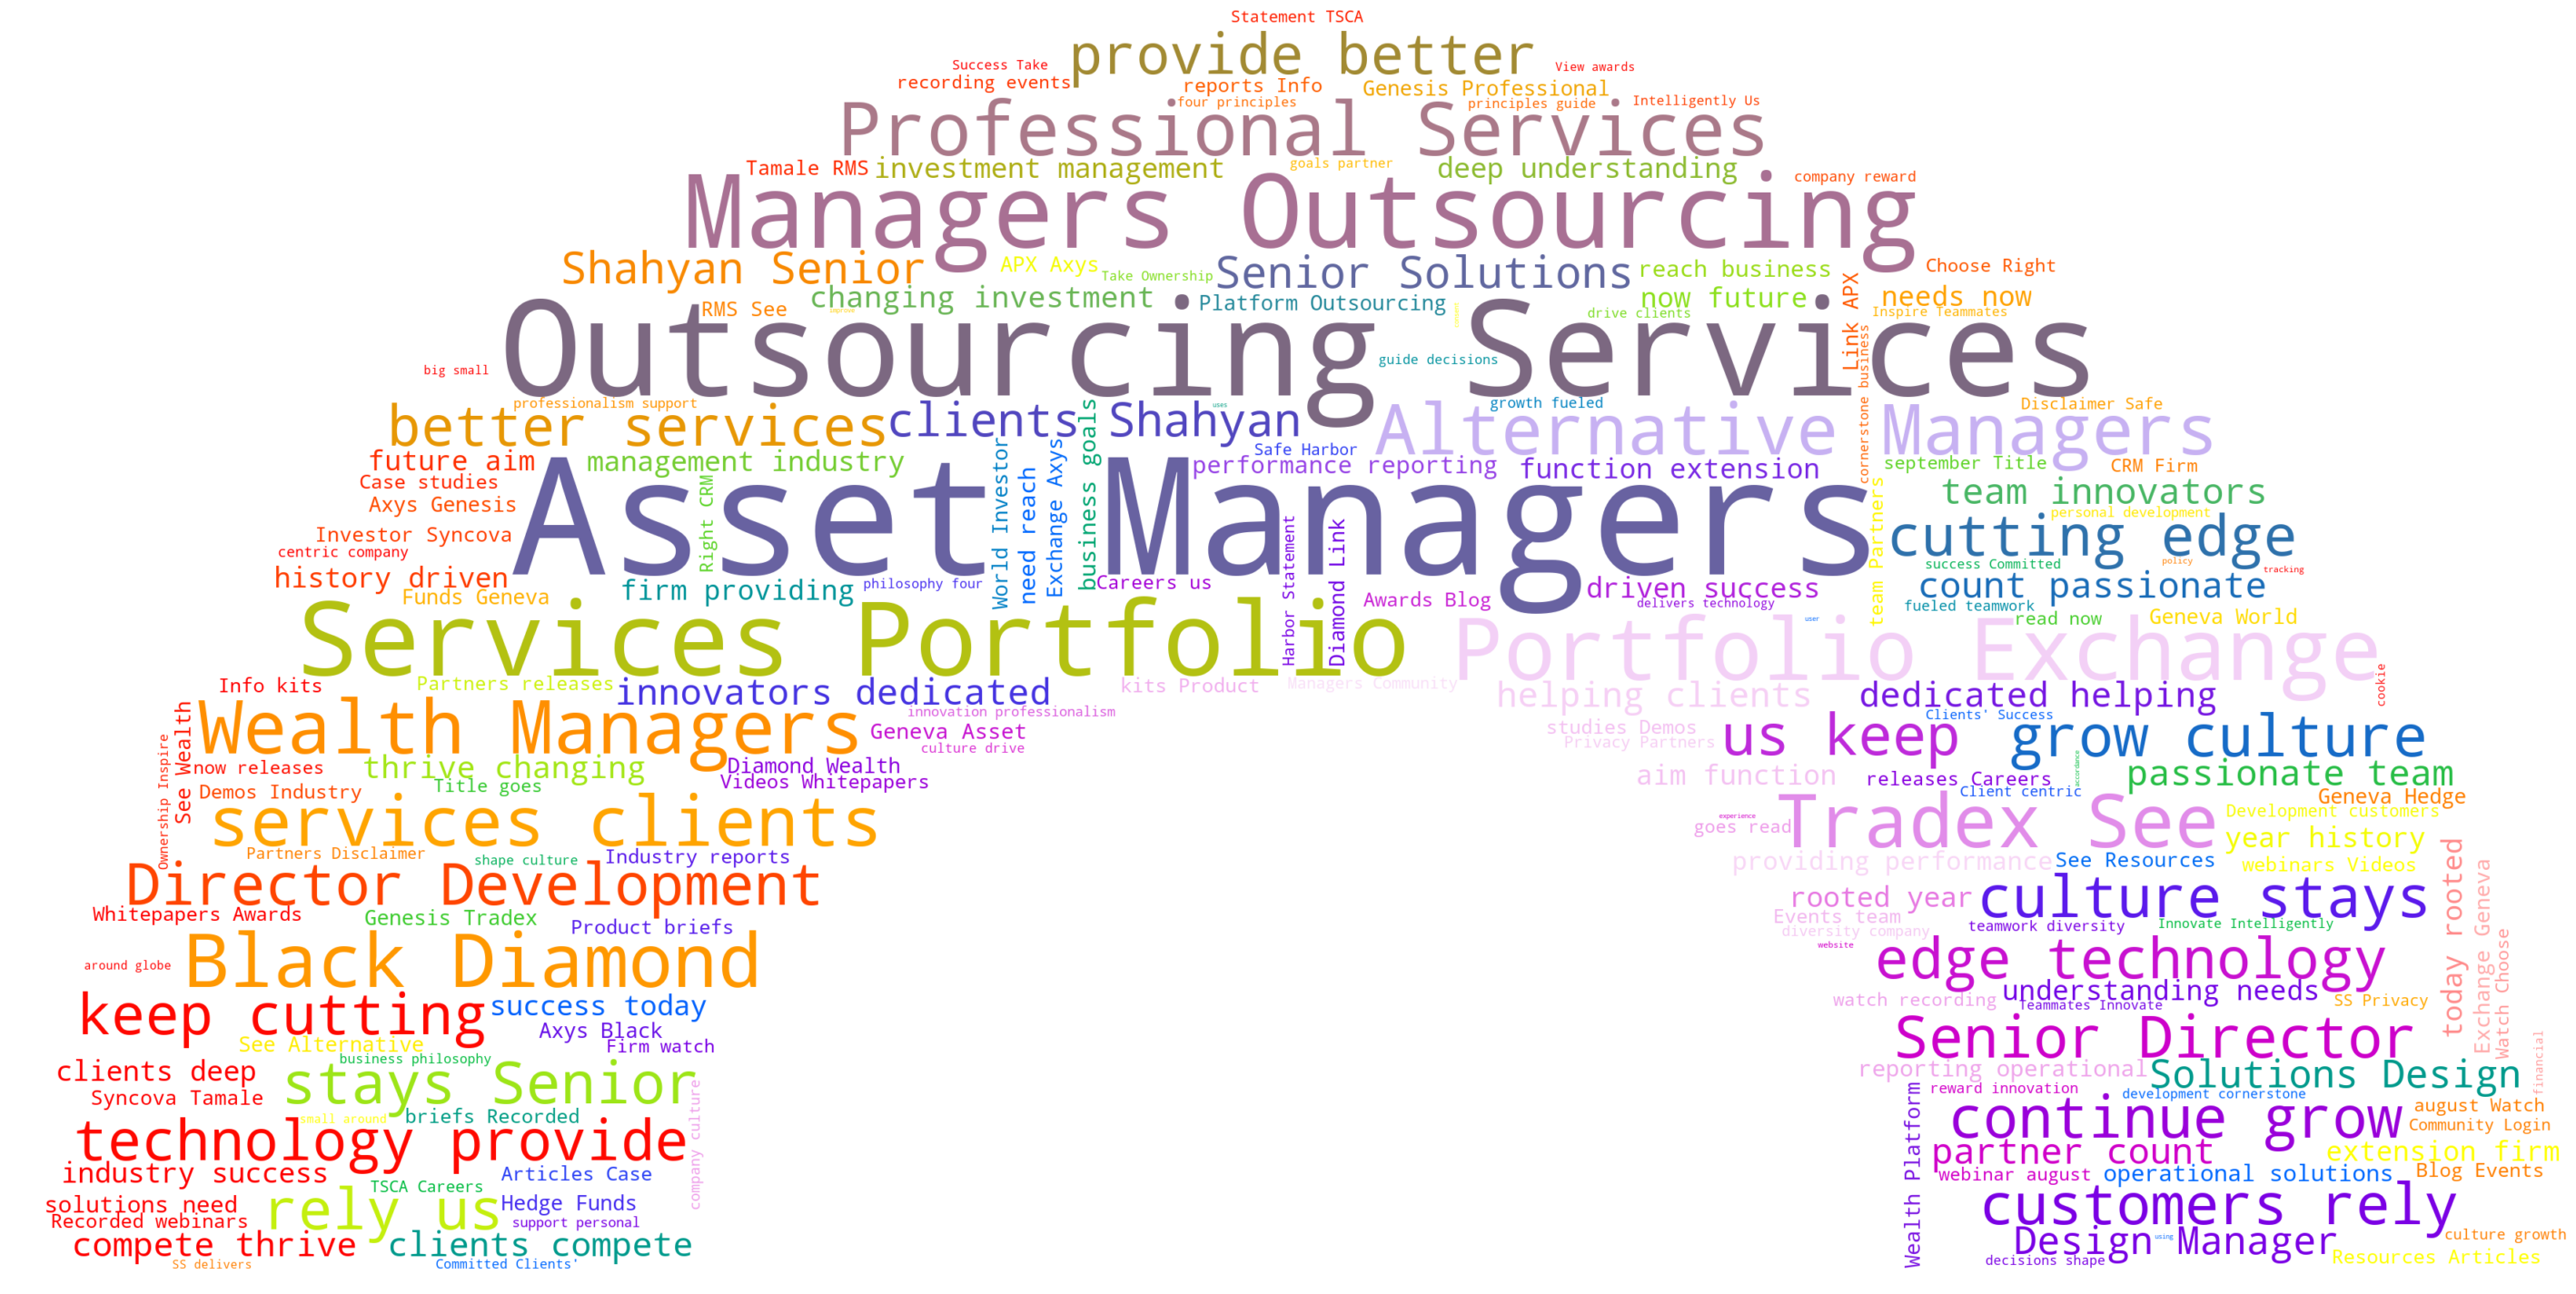

In [8]:
#Plots the wordcloud
wordcloud = WordCloud(width=1200, height=1000, 
                      max_words=400,mask=mask, 
                      stopwords=stopwords, 
                      background_color="white",
                      random_state=42).generate(str)
plt.figure(figsize=(50,100))
plt.imshow(wordcloud.recolor(color_func=color),interpolation="bilinear")
plt.axis("off")
plt.show()